In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150

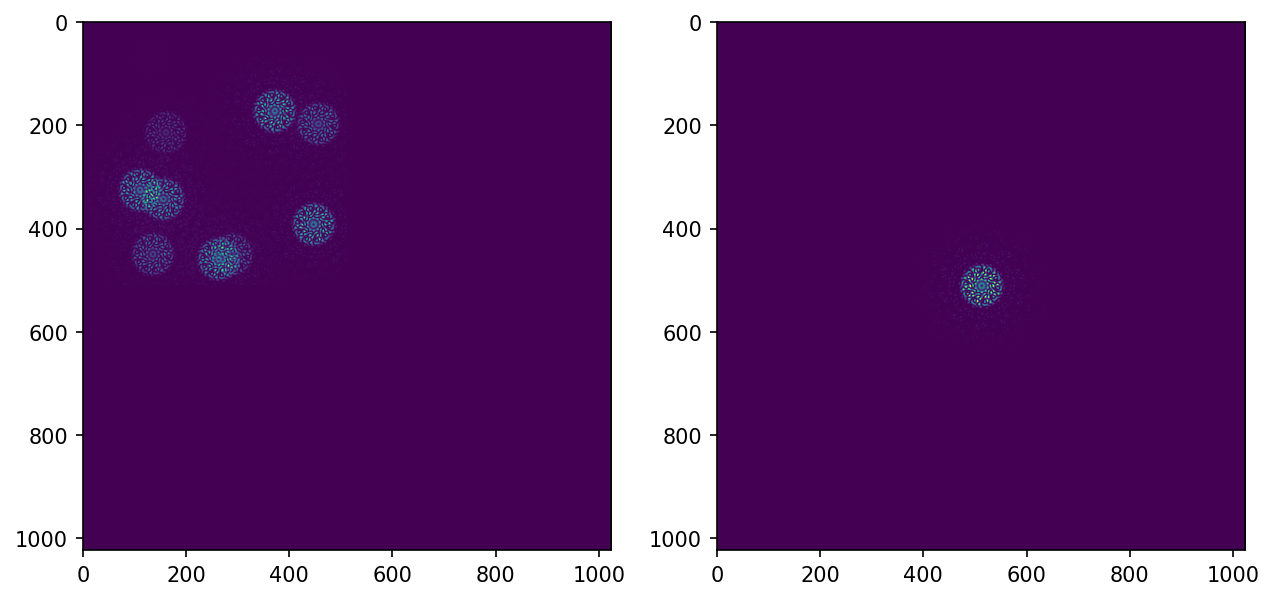

In [4]:
d = np.load('d.npy') # d
m = np.load('m.npy')# m

fig, axes = plt.subplots(1,2, figsize=[10,5])
axes[0].imshow(d)
axes[1].imshow(m)

In [5]:
# Perform fft and conjugations
M = np.fft.fft2(m)
M_conj = np.conjugate(M)
D = np.fft.fft2(d)

# Generate a 2D hamming window
h = np.hamming(len(M))
ham2d = np.sqrt(np.outer(h,h))

# Calculate element-wise multiplications
D_dot_M_conj = np.multiply(D, M_conj)
M_dot_M_conj = np.multiply(M, M_conj)

# Window numerator and denominator with Hamming
numer_windowed = np.multiply(D_dot_M_conj, ham2d)
denom_windowed = np.multiply(M_dot_M_conj, ham2d)

# Perform element-wise division
sigma = np.max(M_dot_M_conj)*0.001
div = np.divide(numer_windowed, denom_windowed + sigma)
# Inverse and shift to get signal
K = np.fft.fftshift(np.fft.ifft2(div))

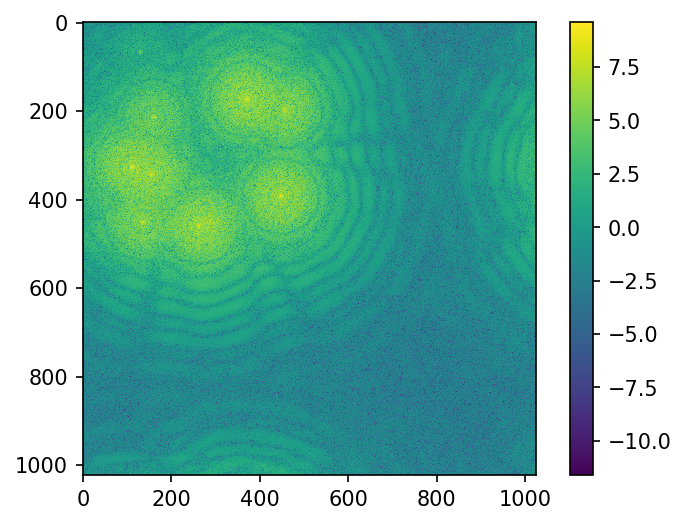

In [6]:
plt.imshow(np.log(np.abs(K)))
plt.colorbar()

## Some diagnostics

Text(0.5, 1.0, 'The sun')

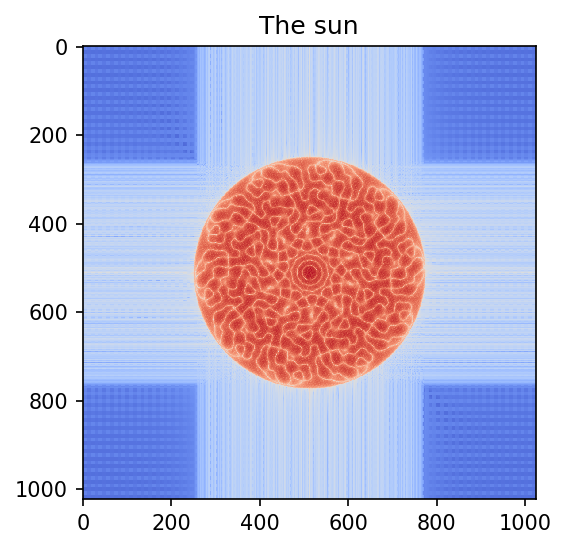

In [7]:
div_shift = np.fft.fftshift(div)
plt.imshow(np.log(np.abs(div_shift)), cmap='coolwarm')
plt.title('The sun')

In [8]:
numer_out = np.fft.ifft2(numer_windowed)
denom_out = np.fft.ifft2(numer_windowed)

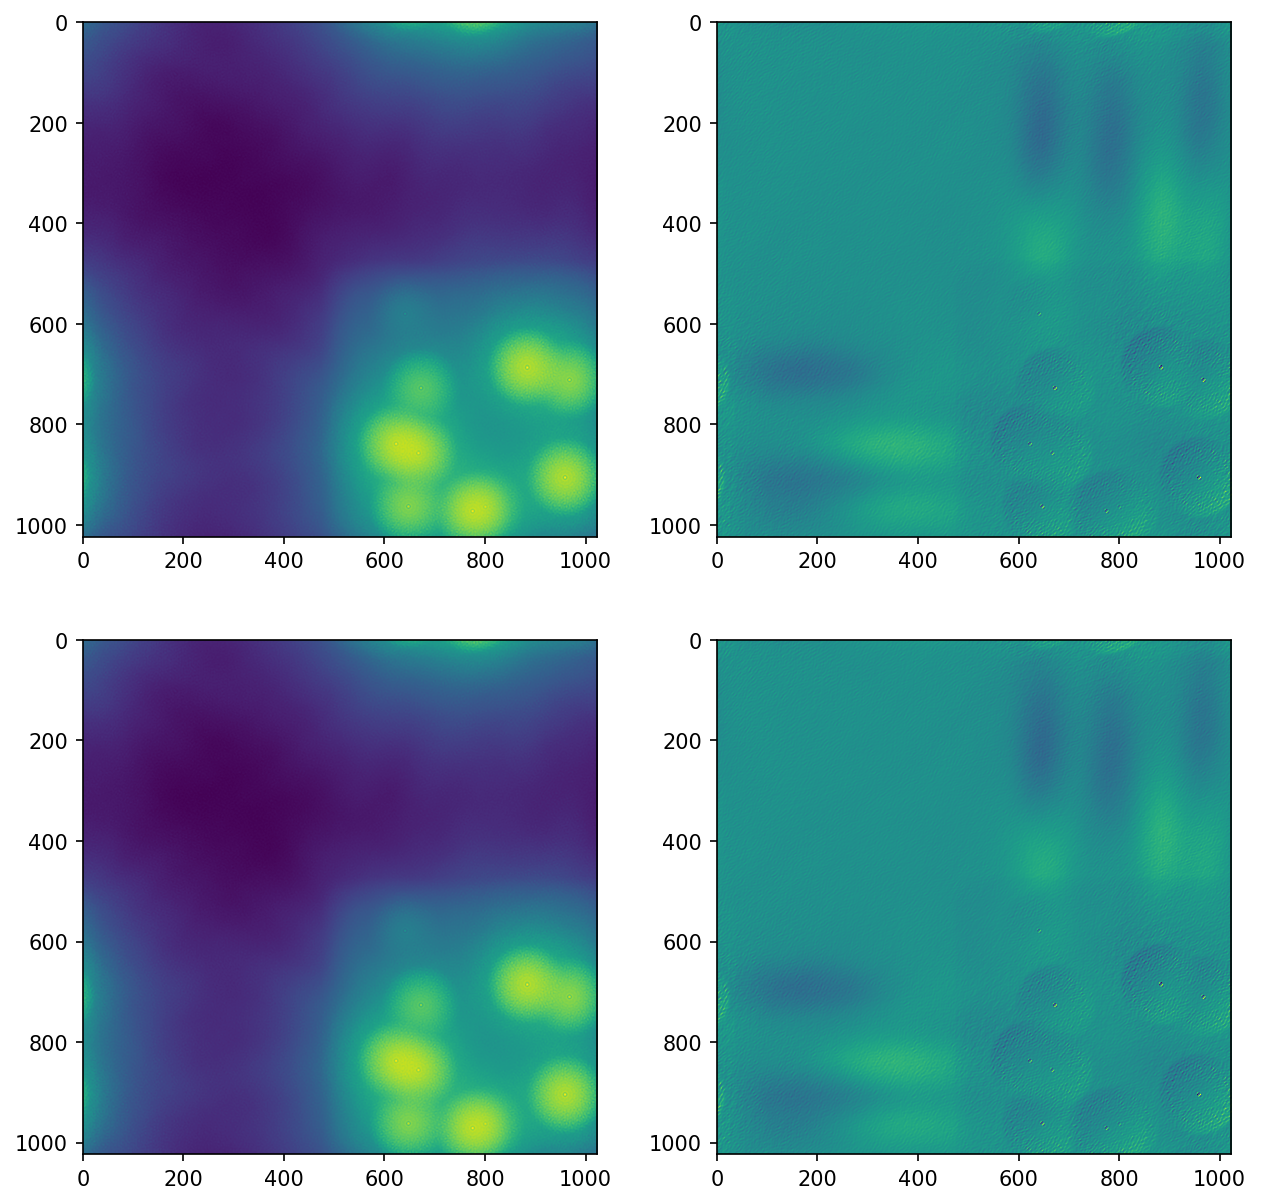

In [9]:
fig, axes = plt.subplots(2,2, figsize=[10,10])
axes = axes.flatten()

axes[0].imshow(np.log(np.abs(numer_out)))
axes[1].imshow(np.angle(numer_out))
axes[2].imshow(np.log(np.abs(denom_out)))
axes[3].imshow(np.angle(denom_out))

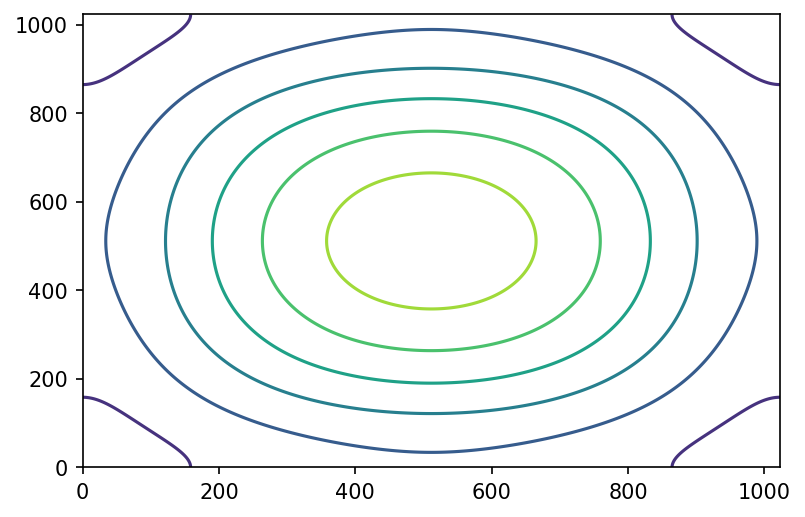

In [10]:
plt.contour(np.abs(ham2d))